# ***ASSIGNMENT 2***
SUBJECT : IT702 - DEEP LEARNING


---


> **SYBMITTED BY : SHANKARANARAYAN N, M.TECH(RESEARCH), DEPARTMENT OF INFORMATION TECHNOLOGY**






---



**NECESSARY IMPORTS**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x=np.array([0.001])
y=np.array([0.001])
z=np.array([0.001])


**IMPORTING THE DATA AND MODIFYING IT TO OUR NEED**

---



In [ ]:
# Import PyDrive and associated libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':'1ubeDWpwWt0FJoDxZkttELi2vxpquzk_M'})
downloaded.GetContentFolder('PNEMONIA')

In [ ]:
df = pd.read_csv('assignment2data.csv')
df["column_a"].replace({True:1 }, inplace=True)
df["column_a"].replace({False:0 }, inplace=True)
df["column_b"].replace({True:1 }, inplace=True)
df["column_b"].replace({False:0 }, inplace=True)
df["column_ai"].replace({"g":1 }, inplace=True)
df["column_ai"].replace({"b":0 }, inplace=True)
df

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,column_m,column_n,column_o,column_p,column_q,column_r,column_s,column_t,column_u,column_v,column_w,column_x,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


**INFORMATION REGARDING THE DATASET AND THE DISTRIBUTION OF PREDICTION DATA**


---




In [ ]:
(df.groupby('column_ai')).count()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,column_m,column_n,column_o,column_p,column_q,column_r,column_s,column_t,column_u,column_v,column_w,column_x,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah
column_ai,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
1,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225


1    225
0    126
Name: column_ai, dtype: int64
______________________
________PLOT__________
______________________




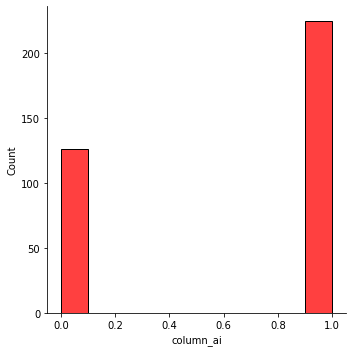

In [ ]:
print(df['column_ai'].value_counts())
print("______________________")
print("________PLOT__________")
print("______________________")
print("\n")
sns.displot(df, x="column_ai",color='red')

**SPLITTING THE DATA**

---



In [ ]:
df1=df.values
m2=len(df['column_ai']) 
X=np.asarray(df1[:,0:34].reshape(m2,34)) 
y=np.asarray(df['column_ai'])



> Indented block



---


**TASK 1 : TO SPLIT THE DATA IN 8:2 RATION AND TABULATE THE RESULT**


---





---


**TASK1:PART 1[SVM]**


---



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
ypredict=svc.predict(X_test)
print(classification_report(Y_test,ypredict))
print("_____________")

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        34
           1       0.78      0.95      0.85        37

    accuracy                           0.83        71
   macro avg       0.85      0.83      0.83        71
weighted avg       0.85      0.83      0.83        71

_____________




---


**TASK1:PART 2[RANDOM FOREST]**


---



In [ ]:

rfc = RandomForestClassifier() 
rfc.fit(X_train,Y_train) 

rfc_predict = rfc.predict(X_test)
print(classification_report(Y_test,rfc_predict))
print("_____________")

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.92      0.97      0.95        37

    accuracy                           0.94        71
   macro avg       0.95      0.94      0.94        71
weighted avg       0.94      0.94      0.94        71

_____________




---


**TASK 2:TO USE 10-FOLD CROSS VERIFICATION AND TABULATE THE RESULT**



---


**TASK2:PART 1[SVM-10FOLD]**


---



In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X_train, Y_train, cv=10)
for i in range(10):
  print("ACCURACY OF FOLD",i+1,"is\t",scores[i])
print("\n\n Mean Accuracy: %0.2f (WITH STANDARD DEVIATION+/- %0.2f)" % (scores.mean(), scores.std() * 2))


ACCURACY OF FOLD 1 is	 0.8928571428571429
ACCURACY OF FOLD 2 is	 0.9285714285714286
ACCURACY OF FOLD 3 is	 0.8571428571428571
ACCURACY OF FOLD 4 is	 0.8214285714285714
ACCURACY OF FOLD 5 is	 0.9285714285714286
ACCURACY OF FOLD 6 is	 0.8571428571428571
ACCURACY OF FOLD 7 is	 0.9642857142857143
ACCURACY OF FOLD 8 is	 0.8571428571428571
ACCURACY OF FOLD 9 is	 0.8928571428571429
ACCURACY OF FOLD 10 is	 0.7857142857142857


 Mean Accuracy: 0.88 (WITH STANDARD DEVIATION+/- 0.10)


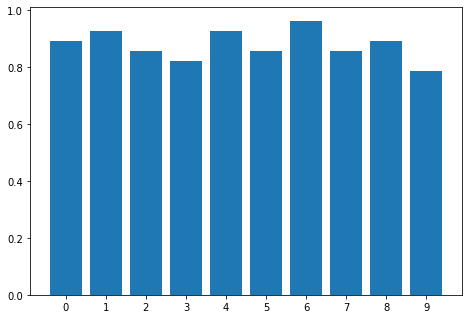

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1', '2', '3', '4','5','6','7','8','9']
ax.bar(langs,scores)
plt.show()

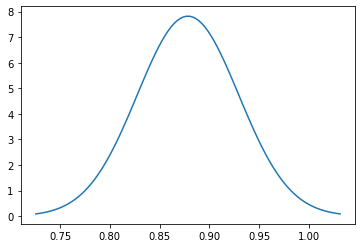

In [ ]:
import scipy.stats as stats
import math

mu = scores.mean()
variance = scores.std()**2
sigma = scores.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()



---


**TASK2:PART 2[RANDOM FOREST-10FOLD]**

---



In [ ]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier() 
scores = cross_val_score(rfc, X_train, Y_train, cv=10)
for i in range(10):
  print("ACCURACY OF FOLD",i+1,"is\t",scores[i])
print("\n\n Mean Accuracy: %0.2f (WITH STANDARD DEVIATION+/- %0.2f)" % (scores.mean(), scores.std() * 2))

ACCURACY OF FOLD 1 is	 0.8928571428571429
ACCURACY OF FOLD 2 is	 0.8928571428571429
ACCURACY OF FOLD 3 is	 0.8214285714285714
ACCURACY OF FOLD 4 is	 0.9285714285714286
ACCURACY OF FOLD 5 is	 0.9642857142857143
ACCURACY OF FOLD 6 is	 0.9642857142857143
ACCURACY OF FOLD 7 is	 1.0
ACCURACY OF FOLD 8 is	 0.9642857142857143
ACCURACY OF FOLD 9 is	 0.8928571428571429
ACCURACY OF FOLD 10 is	 1.0


 Mean Accuracy: 0.93 (WITH STANDARD DEVIATION+/- 0.11)


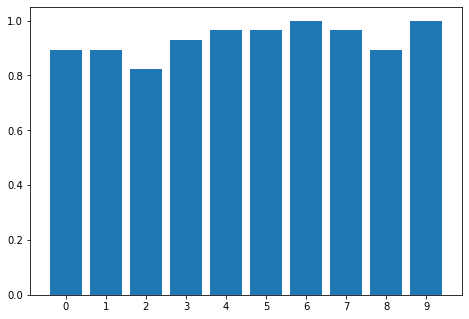

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1', '2', '3', '4','5','6','7','8','9']
ax.bar(langs,scores)
plt.show()

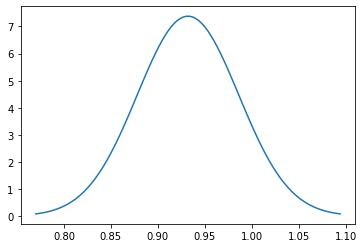

In [ ]:
import scipy.stats as stats
import math

mu = scores.mean()
variance = scores.std()**2
sigma = scores.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()



---


**TASK 3 : TO CHANGE THE HYPER PARAMETERS OF SVM AND RANDOM FOREST AND TABULATE THE OBSERVATION** *italicized text*


---



**TASK3:PART 1[SVM]**


---



In [ ]:
params={'C':[0.001,0.01],
        'gamma':[0.001,0.01],
        'kernel':['linear','poly','rbf','sigmoid']} 

grid_search=GridSearchCV(SVC(random_state=0),params,n_jobs=-1)
grid_search.fit(X_train,Y_train)

print("Train Score"+str(grid_search.score(X_train,Y_train)))

print("TEST Score"+str(grid_search.score(X_test,Y_test)))
print(grid_search.best_params_)

Train Score0.8571428571428571
TEST Score0.7323943661971831
{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}


In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

0.671 (+/-0.017) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.671 (+/-0.017) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}
0.671 (+/-0.017) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.671 (+/-0.017) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.671 (+/-0.017) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
0.671 (+/-0.017) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
0.671 (+/-0.017) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.671 (+/-0.017) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.836 (+/-0.052) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
0.671 (+/-0.017) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.671 (+/-0.017) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.671 (+/-0.017) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.836 (+/-0.052) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
0.671 (+/-0.017) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}
0.671 (+/-0.017) for {'C': 0.01, 'gamma': 0.01



---


**TASK3:PART 2[RANDOM FOREST]**

---



In [ ]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
n_estimators =[10,30]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
param_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth}
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
resulthere=rf_Grid.fit(X_train, Y_train)
rf_Grid.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.7s finished


{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 10}

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.964
Test Accuracy - : 0.887


In [ ]:
means = resulthere.cv_results_['mean_test_score']
stds = resulthere.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, resulthere.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

0.900 (+/-0.043) for {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 10}
0.893 (+/-0.018) for {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 30}
0.911 (+/-0.036) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}
0.914 (+/-0.052) for {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 30}
0.932 (+/-0.055) for {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 10}
0.922 (+/-0.078) for {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 30}
0.918 (+/-0.078) for {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}
0.922 (+/-0.061) for {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 30}
